![Logo](images/logo.png)

<h1 align=center> Exploratory Data Analysis with Python and Pandas </h1>

### Libraries

In [1]:
import pandas as pd                          # data manipulation
import numpy as np                           # scientific computing
import matplotlib.pyplot as plt              # visualization
import seaborn as sns                        # visualization
import calmap                                # calendar heatmaps
from ydata_profiling import ProfileReport    # one-line EDA

Link to data source: https://www.kaggle.com/aungpyaeap/supermarket-sales

### Context



The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data.

### Data Dictionary

1. ***Invoice id:*** Computer generated sales slip invoice identification number
2. ***Branch:*** Branch of supercenter (3 branches are available identified by A, B and C).
3. ***City:*** Location of supercenters
4. ***Customer type:*** Type of customers, recorded by Members for customers using member card and Normal for without member card.
5. ***Gender:*** Gender type of customer
6. ***Product line:*** General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
7. ***Unit price:*** Price of each product in USD
8. ***Quantity:*** Number of products purchased by customer
9. ***Tax:*** 5% tax fee for customer buying
10. ***Total:*** Total price including tax
11. ***Date:*** Date of purchase (Record available from January 2019 to March 2019)
12. ***Time:*** Purchase time (10am to 9pm)
13. ***Payment:*** Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)
14. ***COGS:*** Cost of goods sold
15. ***Gross margin percentage:*** Gross margin percentage
16. ***Gross income:*** Gross income
17. ***Rating:*** Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)


### Task 1: Initial Data Exploration

In [2]:
df = pd.read_csv('data/supermarket_sales.csv')    # read-in the dataset 

In [3]:
df.head(n=3)    # view the first n-rows of the dataset

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total    Date  \
0       Health and beauty       74.69       7.0  26.1415  548.9715  1/5/19   
1  Electronic accessories       15.28       5.0   3.8200   80.2200  3/8/19   
2      Home and lifestyle       46.33       7.0  16.2155  340.5255  3/3/19   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4

In [4]:
df.tail(n=3)    # view the last n-rows of the dataset

Invoice ID Branch      City Customer type  Gender  \
1000  849-09-3807      A    Yangon        Member  Female   
1001  745-74-0715      A    Yangon        Normal    Male   
1002  452-04-8808      B  Mandalay        Normal    Male   

                Product line  Unit price  Quantity  Tax 5%    Total     Date  \
1000     Fashion accessories       88.34       7.0  30.919  649.299  2/18/19   
1001  Electronic accessories         NaN       2.0   5.803  121.863  3/10/19   
1002  Electronic accessories       87.08       NaN  30.478  640.038  1/26/19   

       Time  Payment    cogs  gross margin percentage  gross income  Rating  
1000  13:28     Cash  618.38                 4.761905        30.919     6.6  
1001  20:46  Ewallet  116.06                 4.761905         5.803     8.8  
1002  15:17     Cash  609.56                 4.761905        30.478     5.5

In [5]:
df.columns    # get the columns of the dataset

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [6]:
df.dtypes    # get the data type of each column

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                   float64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

As you can see, the `Date` column is of type `object`. Due to its characteristic, we can change it to `datetime` to handle it as such.

In [7]:
df['Date'] = pd.to_datetime(df['Date'],format='%m/%d/%y')    # change the type of 'Date' column from object to datetime

We verify if the data type has indeed changed:

In [8]:
df.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                          float64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

It is a convention to set the `Date` column as the index of the dataframe, let's do it.

In [9]:
df = df.set_index('Date')    # set the Date column as the index of df

Now we verify the index of the dataframe.

In [10]:
df.head()

Invoice ID Branch       City Customer type  Gender  \
Date                                                              
2019-01-05  750-67-8428      A     Yangon        Member  Female   
2019-03-08  226-31-3081      C  Naypyitaw        Normal  Female   
2019-03-03  631-41-3108      A     Yangon        Normal    Male   
2019-01-27  123-19-1176      A     Yangon        Member    Male   
2019-02-08  373-73-7910      A     Yangon        Normal    Male   

                      Product line  Unit price  Quantity   Tax 5%     Total  \
Date                                                                          
2019-01-05       Health and beauty       74.69       7.0  26.1415  548.9715   
2019-03-08  Electronic accessories       15.28       5.0   3.8200   80.2200   
2019-03-03      Home and lifestyle       46.33       7.0  16.2155  340.5255   
2019-01-27       Health and beauty       58.22       8.0  23.2880  489.0480   
2019-02-08       Sports and travel       86.31       7.0  30.2085  634.3785   

             Time      Payment    cogs  gross margin percentage  gross income  \
Date                                                                            
2019-01-05  13:08      Ewallet  522.83                 4.761905       26.1415   
2019-03-08  10:29         Cash   76.40                 4.761905        3.8200   
2019-03-03  13:23  Credit card  324.31                 4.761905       16.2155   
2019-01-27  20:33      Ewallet  465.76                 4.761905       23.2880   
2019-02-08  10:37      Ewallet  604.17                 4.761905       30.2085   

            Rating  
Date                
2019-01-05     9.1  
2019-03-08     9.6  
2019-03-03     7.4  
2019-01-27     8.4  
2019-02-08     5.3

Now let's quickly calculate some **summary statistics** about the columns.

In [11]:
df.describe()    # This way, the function generates summary statistics for only the numeric columns

Unit price    Quantity       Tax 5%        Total         cogs  \
count  996.000000  983.000000  1003.000000  1003.000000  1003.000000   
mean    55.764568    5.501526    15.400368   323.407726   308.007358   
std     26.510165    2.924673    11.715192   246.019028   234.303836   
min     10.080000    1.000000     0.508500    10.678500    10.170000   
25%     33.125000    3.000000     5.894750   123.789750   117.895000   
50%     55.420000    5.000000    12.096000   254.016000   241.920000   
75%     78.085000    8.000000    22.539500   473.329500   450.790000   
max     99.960000   10.000000    49.650000  1042.650000   993.000000   

       gross margin percentage  gross income       Rating  
count             1.003000e+03   1003.000000  1003.000000  
mean              4.761905e+00     15.400368     6.972682  
std               6.131488e-14     11.715192     1.717647  
min               4.761905e+00      0.508500     4.000000  
25%               4.761905e+00      5.894750     5.500000  
50%               4.761905e+00     12.096000     7.000000  
75%               4.761905e+00     22.539500     8.500000  
max               4.761905e+00     49.650000    10.000000

While this data is interesting, having a graphical representation of it can help us understand it better.

### Task 2: Univariate Analysis

Something important to clarify is that **exploratory data analysis** (EDA) typically isn't a linear set of steps from A to Z. Since each dataset is unique, the approach to exploring it will vary. Therefore, a more effective approach to EDA is to formulate a question and then explore the data to answer it.

**Question 1:** What does the distribution of customer ratings looks like? Is it skewed?

In [12]:
import warnings
warnings.filterwarnings("ignore", "use_inf_as_na")    # The following graph generates a warning, which can be suppressed with this line

In the project, `distplot` is used, but it will be deprecated in future versions. Therefore, to replicate the graph, I use `histplot` with the following parameters.

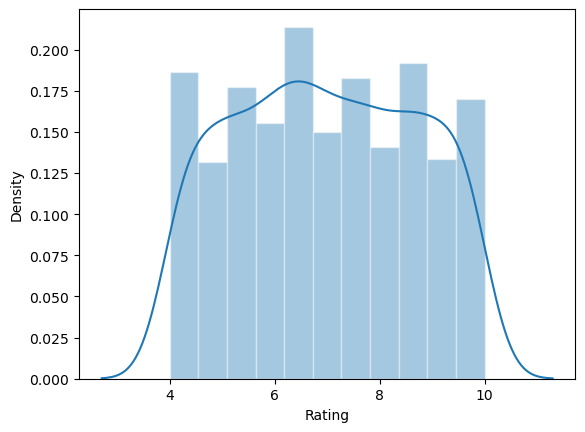

In [13]:
sns.histplot(df['Rating'], kde=True, stat="density",kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4));

Regarding the graph, it seems to have a **uniform distribution**; none of the Rating values particularly spikes out. It seems that there is an equal probability of someone rating between 4 to 10. 

To see if the distribution is skewed, we can add a couple of elements, starting with the mean.

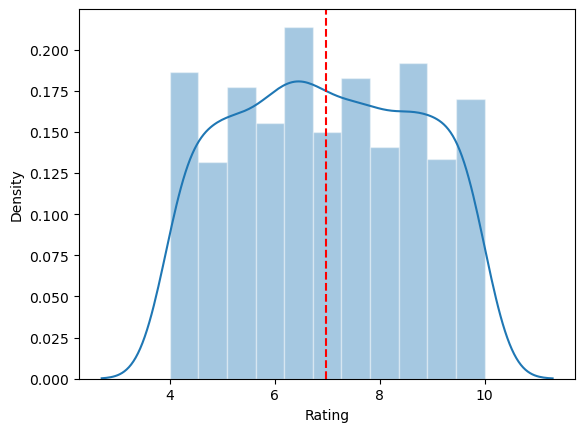

In [14]:
sns.histplot(df['Rating'], kde=True, stat="density",kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4))
plt.axvline(x=np.mean(df['Rating']), c='r', ls='--', label='mean');    # plotting the mean as a vertical red line

Now let's add the 25th and 75th percentiles.

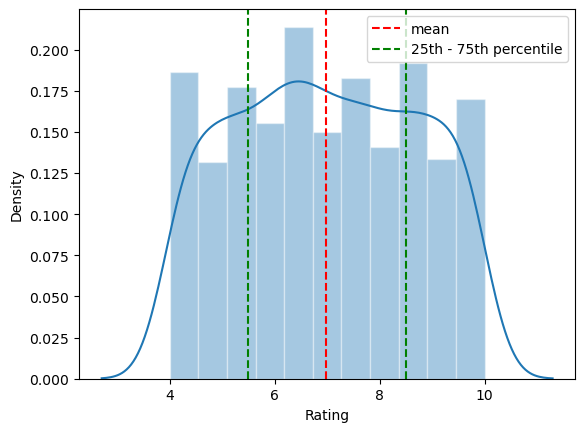

In [15]:
sns.histplot(df['Rating'], kde=True, stat="density",kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4))
plt.axvline(x=np.mean(df['Rating']), c='r', ls='--', label='mean')                              # plotting the mean as a vertical red line
plt.axvline(x=np.percentile(df['Rating'], 25), c='g', ls='--', label='25th - 75th percentile')  # plotting the 25th percentile as a vertical green line
plt.axvline(x=np.percentile(df['Rating'], 75), c='g', ls='--')                                  # plotting the 75th percentile as a vertical green line
plt.legend()     # show the labels on the plot
plt.show()

Interpreting the graph, the distribution of user ratings appears uniform without any noticeable skew to the left or right.

If you're curious about the distribution of the other numeric variables, you can generate multiple graphs as follows:

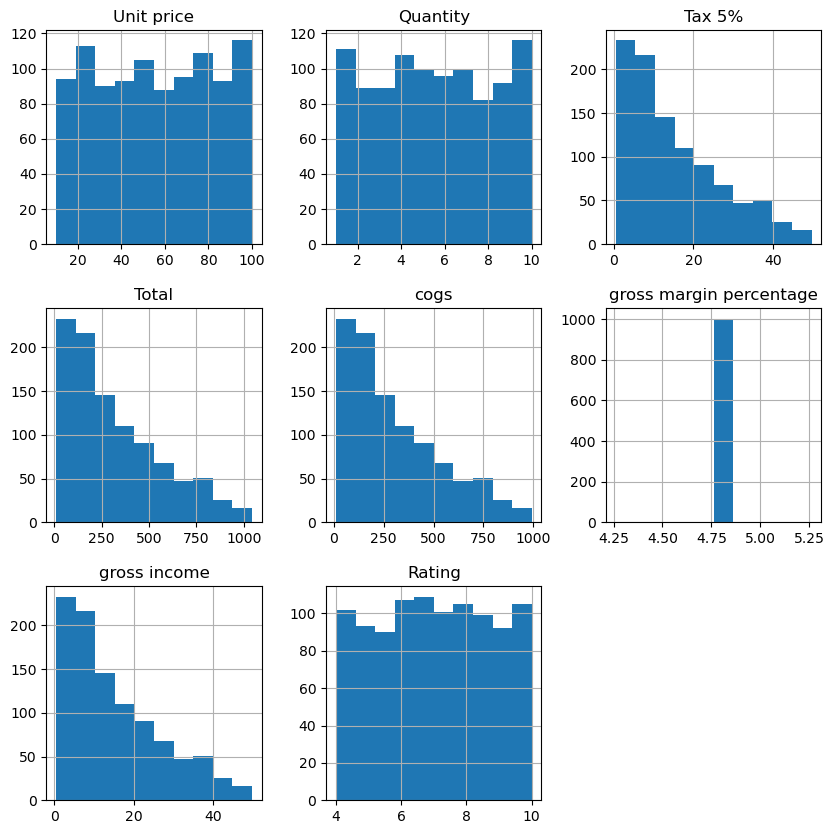

In [16]:
df.hist(figsize=(10, 10));

* From this, it appears that `Unit price` and `Quantity` follow a uniform distribution. 
* `Tax` has a right skew, indicating that the majority of the collected taxes are between 0 and 20, with a few cases greater than 40. 
* The `Gross margin percentage` is a constant value, explaining its graphical representation and distribution. 
* The `Cost of goods sold (cogs)`, `Total`, and `Gross income` are highly correlated variables, so it's not surprising that they all follow nearly identical distributions.

**Question 2:** Do aggregate sales numbers differ by much between branches?

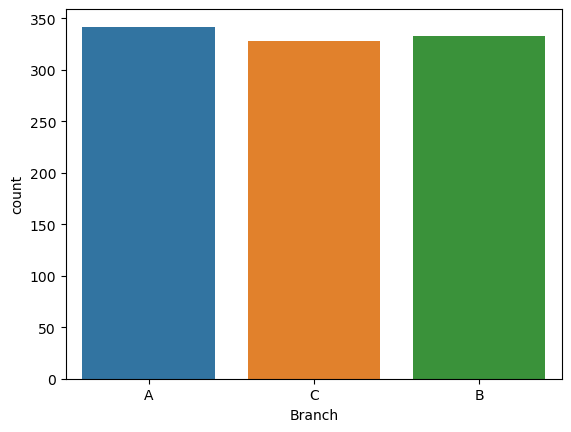

In [17]:
sns.countplot(x='Branch', data=df, hue='Branch');

As we can see, the number of sales aggregated by branch does not differ much from each other; they have similar values. To obtain detailed information on the exact number, we can use the following line of code:

In [18]:
df['Branch'].value_counts()    # counts of unique values

Branch
A    342
B    333
C    328
Name: count, dtype: int64

This same type of graph can be used with other categorical variables to get more information from our data. Let's analyze if there is a difference between the payment methods used by users.

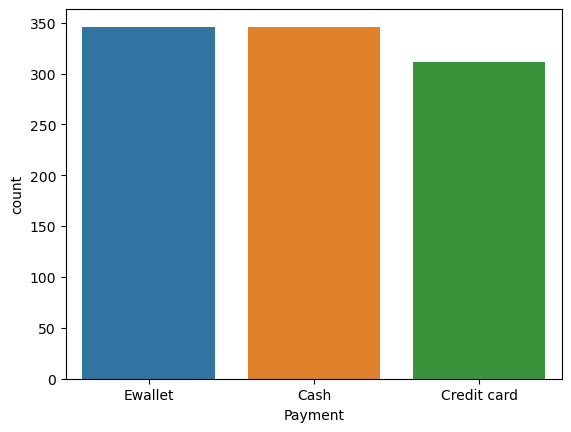

In [19]:
sns.countplot(x='Payment', data=df, hue='Payment');

E-wallet appears to be the most popular method among users. Surprisingly, credit card seems to be the least popular method of payment among customers.

### Task 3: Bivariate Analysis

**Question 3:** Is there a relationship between gross income and customer ratings?

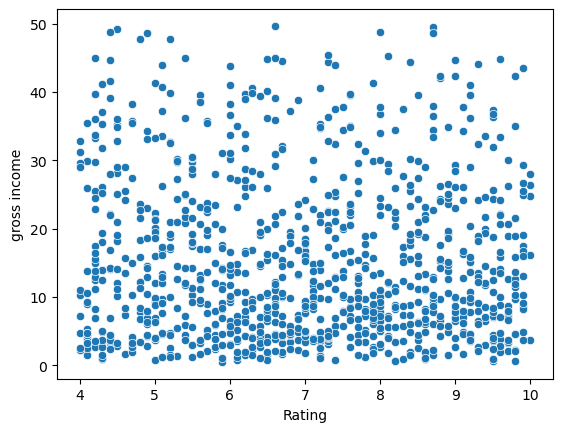

In [20]:
sns.scatterplot(data=df, x='Rating', y='gross income');    # draw a scatter plot

There doesn't seem to be any influence or relationship between gross income and rating. We could also look at the trend line to check if our eyes are deceiving us.

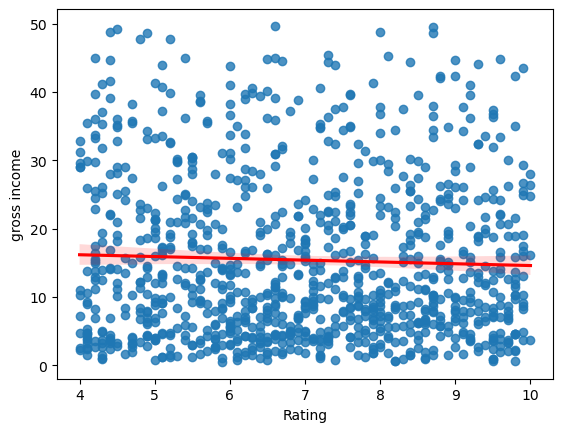

In [21]:
sns.regplot(data=df, x='Rating', y='gross income', line_kws={'color': 'red'});    # plot data and a linear regression model fit

The trend line reaffirms our previous inspection, as it is very flat, confirming the weak relationship between these variables.

Now my curiosity is piqued! Is there any relationship between `Branch` and `gross income`? Do different branches show different average gross incomes?

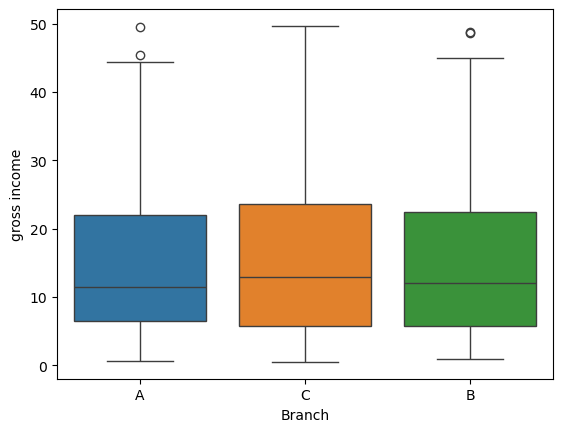

In [22]:
sns.boxplot(data=df, x='Branch', y='gross income', hue='Branch');    # draw a box plot to show distributions with respect to categories

Although Branch C shows a slightly higher median than the rest, there doesn't seem to be a significant variation in gross income between branches, at least at an aggregate level.

We can also look into the relationship between `Gender` and `gross income`.

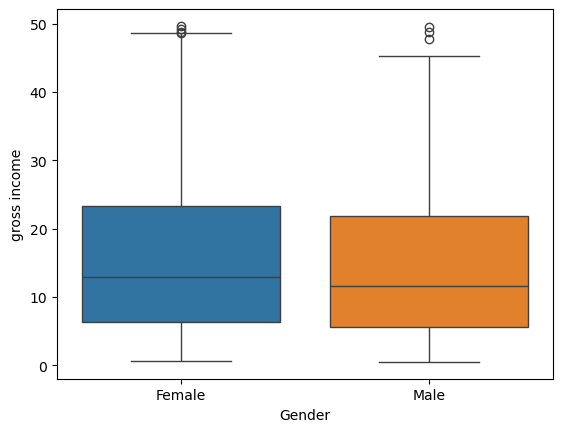

In [23]:
sns.boxplot(data=df, x='Gender', y='gross income', hue='Gender');     # draw a box plot to show distributions with respect to categories

At least in this dataset, men seem to spend the same amount as women, although at the 75th percentile, women seem to spend more than men. But on average, they turn out to be very similar.

**Question 4:** Is there a noticeable time trend in gross income?

Before conducting this analysis, we should note something: there can be multiple customers for the same date.

In [24]:
df.index.value_counts()

Date
2019-02-07    20
2019-02-15    19
2019-01-26    18
2019-03-02    18
2019-01-08    18
              ..
2019-01-04     6
2019-02-28     6
2019-02-21     6
2019-03-17     6
2019-02-01     6
Name: count, Length: 89, dtype: int64

So, we need to find a way to group them. For that, we can use the following function:

In [25]:
agg_date_df = df.groupby(df.index)    # group DataFrame using a mapper or by a Series of columns

In [26]:
agg_date_df['gross income'].mean()

Date
2019-01-01    18.830083
2019-01-02    11.580375
2019-01-03    12.369813
2019-01-04    12.886417
2019-01-05    14.034458
                ...    
2019-03-26     7.188692
2019-03-27    13.822950
2019-03-28    10.616200
2019-03-29    23.947875
2019-03-30    19.424500
Name: gross income, Length: 89, dtype: float64

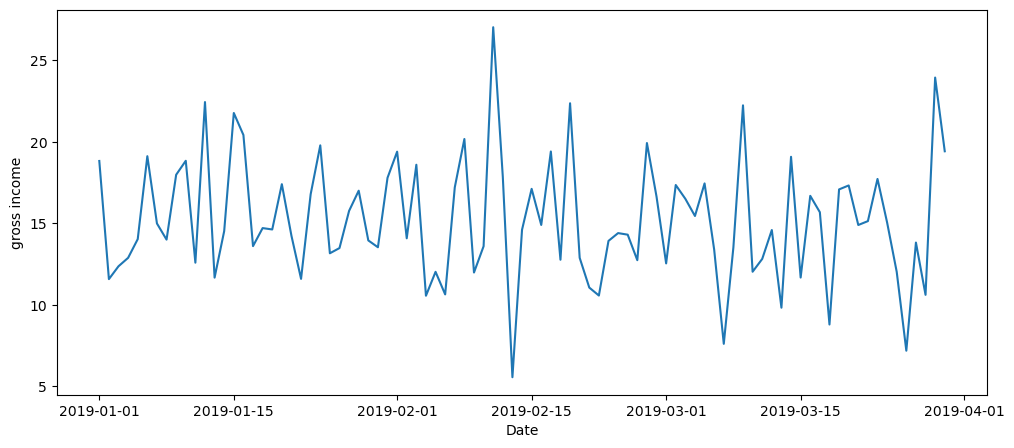

In [27]:
plt.figure(figsize=(12, 5))
sns.lineplot(agg_date_df['gross income'].mean());    # draw a line plot with possibility of several semantic groupings

There doesn't seem to be any clear time trend in this graph; it varies around the same mean. There are some days with high gross income and others with low gross income, but there doesn't appear to be any particular trend. This might be because we're only analyzing three months; with more data, the findings could be different, and we could focus more on seasonal details.

If we want to plot all possible bivariate relationships, we can do the following with seaborn. This is not recommended for very large datasets because it may consume a lot of time. You can either select a subset of interest or check how large the dataset is.

In [28]:
# sns.pairplot(df)

In [29]:
df.index.is_unique

False

If you try to generate the graph in this way, you will get the following error: "*ValueError: cannot reindex on an axis with duplicate labels*". This is because the indices do not contain unique values. What we can do is reset the index when generating the graph.

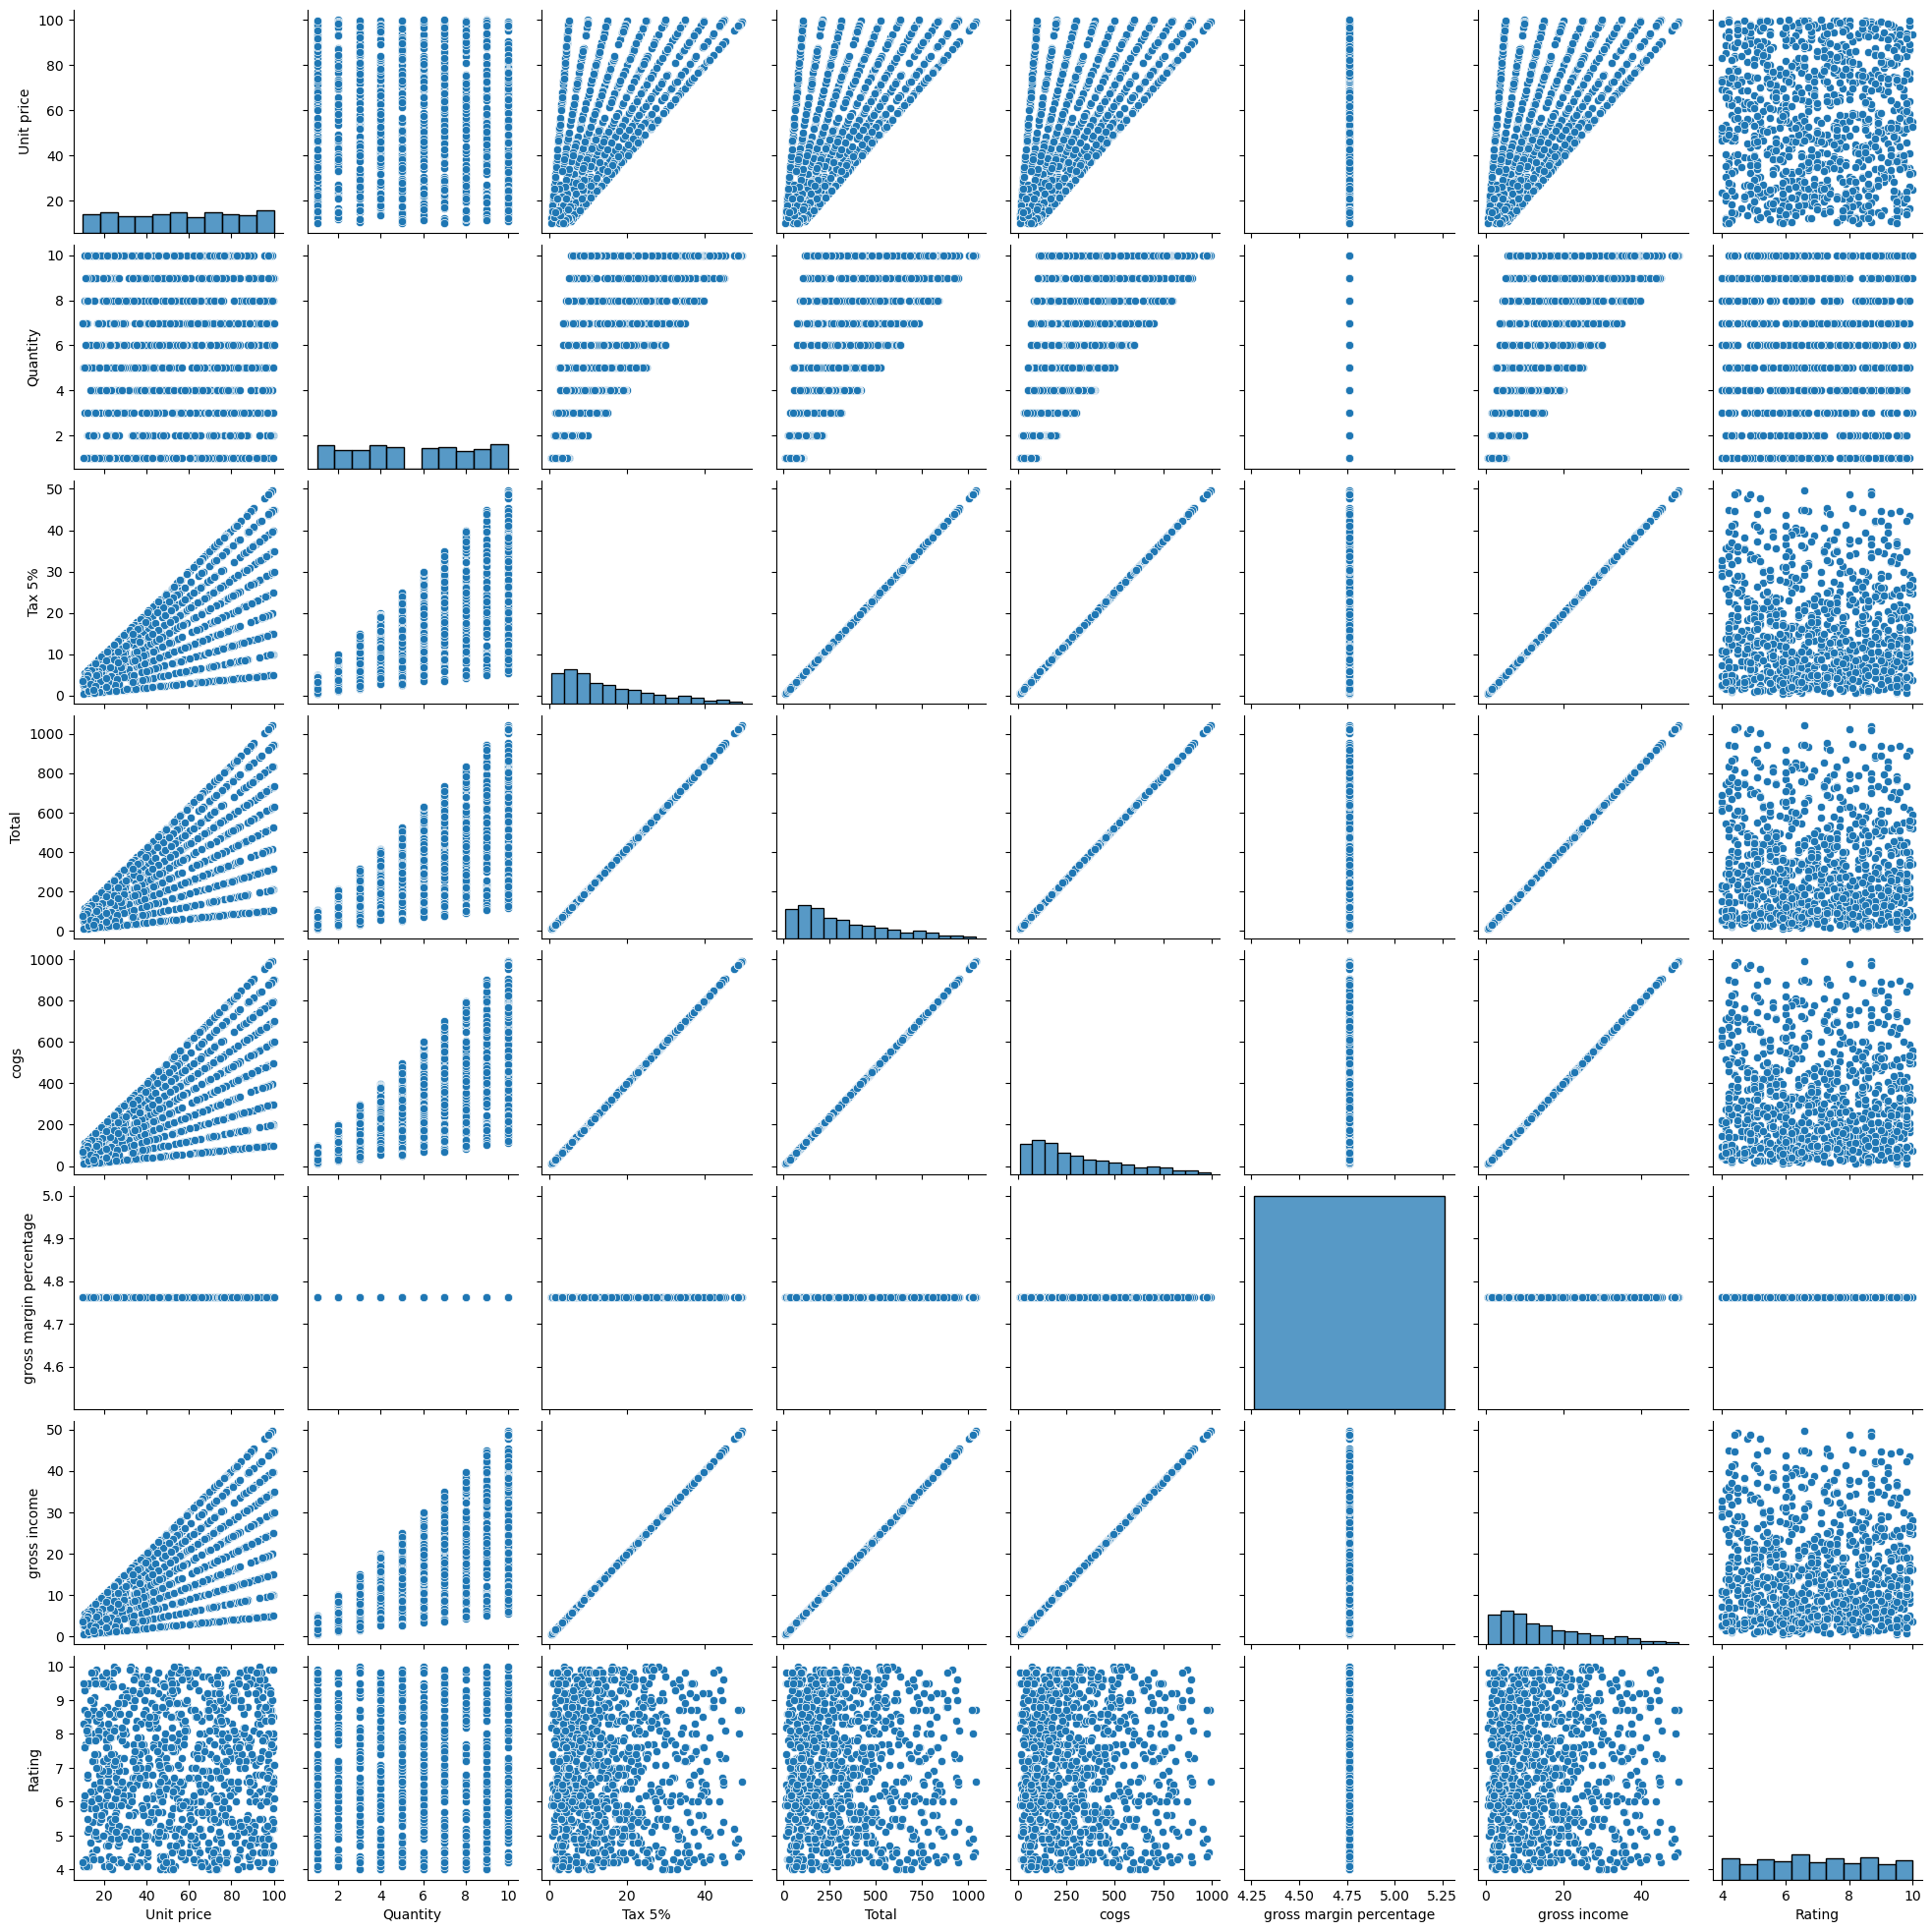

In [30]:
sns.pairplot(df.reset_index());    # plot pairwise relationships in a dataset

With this graph, you can not only see the univariate distributions but also the pairwise distributions.

### Task 4: Dealing With Duplicate Rows and Missing Values

In [31]:
df.duplicated()    # Return boolean Series denoting duplicate rows.

Date
2019-01-05    False
2019-03-08    False
2019-03-03    False
2019-01-27    False
2019-02-08    False
              ...  
2019-02-22    False
2019-02-18    False
2019-02-18     True
2019-03-10     True
2019-01-26     True
Length: 1003, dtype: bool

In [32]:
df.duplicated().sum()

3

We found that there are 3 duplicate records (rows) which we want to remove. To see which rows are duplicated, let's use this code:

In [33]:
df[df.duplicated()]

Invoice ID Branch      City Customer type  Gender  \
Date                                                             
2019-02-18  849-09-3807      A    Yangon        Member  Female   
2019-03-10  745-74-0715      A    Yangon        Normal    Male   
2019-01-26  452-04-8808      B  Mandalay        Normal    Male   

                      Product line  Unit price  Quantity  Tax 5%    Total  \
Date                                                                        
2019-02-18     Fashion accessories       88.34       7.0  30.919  649.299   
2019-03-10  Electronic accessories         NaN       2.0   5.803  121.863   
2019-01-26  Electronic accessories       87.08       NaN  30.478  640.038   

             Time  Payment    cogs  gross margin percentage  gross income  \
Date                                                                        
2019-02-18  13:28     Cash  618.38                 4.761905        30.919   
2019-03-10  20:46  Ewallet  116.06                 4.761905         5.803   
2019-01-26  15:17     Cash  609.56                 4.761905        30.478   

            Rating  
Date                
2019-02-18     6.6  
2019-03-10     8.8  
2019-01-26     5.5

These particular rows are repeated more than once in our dataset. To remove the duplicates, we can simply use the following function:

In [34]:
df = df.drop_duplicates()    # return DataFrame with duplicate rows removed

We verify again that there are no duplicate values.

In [35]:
df.duplicated().sum()

0

Now it's time to check for missing values. To see the number of missing values per column:

In [36]:
df.isna().sum()

Invoice ID                  0
Branch                      0
City                        0
Customer type              79
Gender                      0
Product line               43
Unit price                  6
Quantity                   19
Tax 5%                      0
Total                       0
Time                        0
Payment                     0
cogs                        0
gross margin percentage     0
gross income                0
Rating                      0
dtype: int64

As we can see, although most columns do not have missing values, some such as `Customer Type`, `Product Line`, `Unit Price`, and `Quantity` have several missing values. So, we need to address these columns.

For the ratio of missingness:

In [37]:
df.isna().sum()/len(df)

Invoice ID                 0.000
Branch                     0.000
City                       0.000
Customer type              0.079
Gender                     0.000
Product line               0.043
Unit price                 0.006
Quantity                   0.019
Tax 5%                     0.000
Total                      0.000
Time                       0.000
Payment                    0.000
cogs                       0.000
gross margin percentage    0.000
gross income               0.000
Rating                     0.000
dtype: float64

A cool way to visualize this is through a seaborn heatmap.

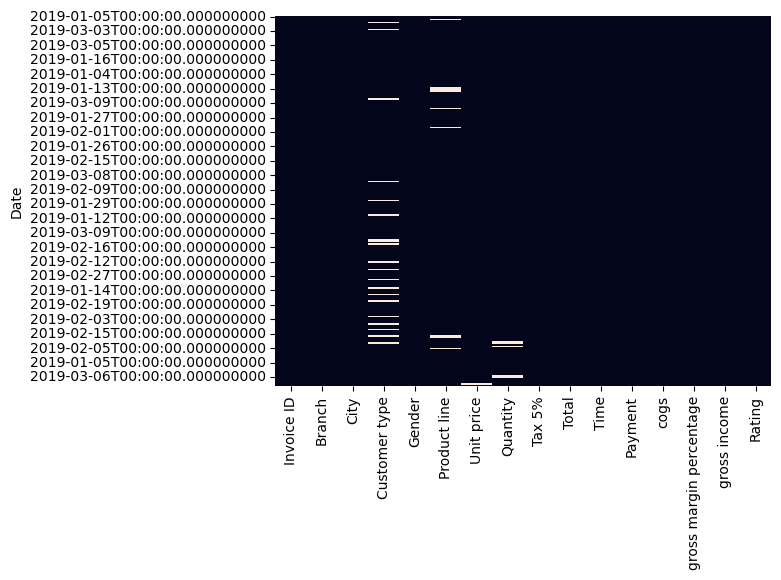

In [38]:
sns.heatmap(df.isnull(), cbar=False);

Now that we've identified them, it's time to deal with them. I want to clarify that there are multiple ways to deal with missing values, and there are entire books on the subject. But let's keep things simple for the introductory purposes of this example.

To fill the missing values with zero, you would use: `df.fillna(0)`. However, we will choose to fill them with the mean. 

In [39]:
df.fillna(0)

Invoice ID Branch       City Customer type  Gender  \
Date                                                              
2019-01-05  750-67-8428      A     Yangon        Member  Female   
2019-03-08  226-31-3081      C  Naypyitaw        Normal  Female   
2019-03-03  631-41-3108      A     Yangon        Normal    Male   
2019-01-27  123-19-1176      A     Yangon        Member    Male   
2019-02-08  373-73-7910      A     Yangon        Normal    Male   
...                 ...    ...        ...           ...     ...   
2019-01-29  233-67-5758      C  Naypyitaw        Normal    Male   
2019-03-02  303-96-2227      B   Mandalay        Normal  Female   
2019-02-09  727-02-1313      A     Yangon        Member    Male   
2019-02-22  347-56-2442      A     Yangon        Normal    Male   
2019-02-18  849-09-3807      A     Yangon        Member  Female   

                      Product line  Unit price  Quantity   Tax 5%      Total  \
Date                                                                           
2019-01-05       Health and beauty       74.69       7.0  26.1415   548.9715   
2019-03-08  Electronic accessories       15.28       5.0   3.8200    80.2200   
2019-03-03      Home and lifestyle       46.33       7.0  16.2155   340.5255   
2019-01-27       Health and beauty       58.22       8.0  23.2880   489.0480   
2019-02-08       Sports and travel       86.31       7.0  30.2085   634.3785   
...                            ...         ...       ...      ...        ...   
2019-01-29       Health and beauty        0.00       1.0   2.0175    42.3675   
2019-03-02      Home and lifestyle        0.00      10.0  48.6900  1022.4900   
2019-02-09      Food and beverages        0.00       1.0   1.5920    33.4320   
2019-02-22      Home and lifestyle       65.82       1.0   3.2910    69.1110   
2019-02-18     Fashion accessories       88.34       7.0  30.9190   649.2990   

             Time      Payment    cogs  gross margin percentage  gross income  \
Date                                                                            
2019-01-05  13:08      Ewallet  522.83                 4.761905       26.1415   
2019-03-08  10:29         Cash   76.40                 4.761905        3.8200   
2019-03-03  13:23  Credit card  324.31                 4.761905       16.2155   
2019-01-27  20:33      Ewallet  465.76                 4.761905       23.2880   
2019-02-08  10:37      Ewallet  604.17                 4.761905       30.2085   
...           ...          ...     ...                      ...           ...   
2019-01-29  13:46      Ewallet   40.35                 4.761905        2.0175   
2019-03-02  17:16      Ewallet  973.80                 4.761905       48.6900   
2019-02-09  13:22         Cash   31.84                 4.761905        1.5920   
2019-02-22  15:33         Cash   65.82                 4.761905        3.2910   
2019-02-18  13:28         Cash  618.38                 4.761905       30.9190   

            Rating  
Date                
2019-01-05     9.1  
2019-03-08     9.6  
2019-03-03     7.4  
2019-01-27     8.4  
2019-02-08     5.3  
...            ...  
2019-01-29     6.2  
2019-03-02     4.4  
2019-02-09     7.7  
2019-02-22     4.1  
2019-02-18     6.6  

[1000 rows x 16 columns]

Of the columns we identified with missing values, select only the numeric ones; it wouldn't make sense to impute a mean to a category.

In [40]:
df.loc[:,'Unit price'] = df['Unit price'].fillna(df.loc[:,'Unit price'].mean())
df.loc[:,'Quantity'] = df['Quantity'].fillna(df.loc[:,'Quantity'].mean())

Let's generate the heatmap again to verify if there are no missing values in the numeric columns anymore.

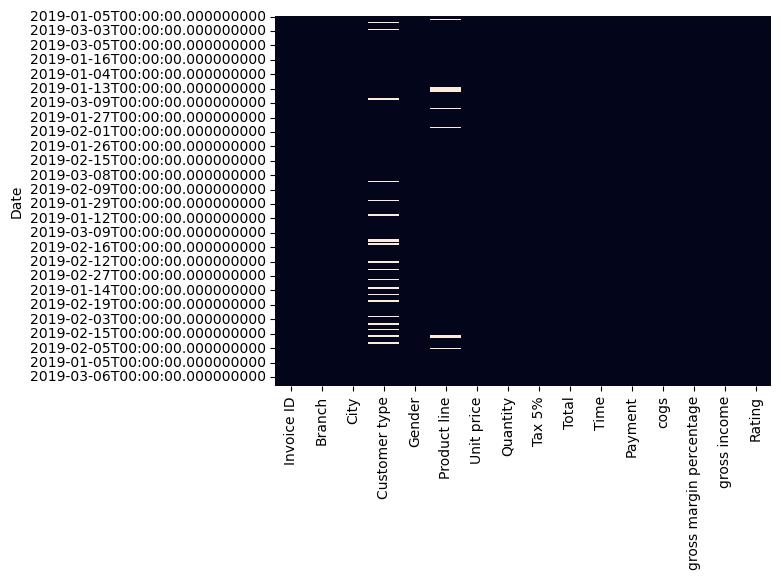

In [41]:
sns.heatmap(df.isnull(), cbar=False);

Regarding categorical variables, we can replace missing values with the mode, which is the most popular value among the categories. When you use the `mode()` function, keep in mind that the first row is the one that generates the mode value for each of the columns.

In [42]:
df.mode().head(3)

Invoice ID Branch    City Customer type  Gender         Product line  \
0  101-17-6199      A  Yangon        Normal  Female  Fashion accessories   
1  101-81-4070    NaN     NaN           NaN     NaN                  NaN   
2  102-06-2002    NaN     NaN           NaN     NaN                  NaN   

   Unit price  Quantity  Tax 5%    Total   Time  Payment    cogs  \
0   55.700292      10.0   4.154   87.234  14:42  Ewallet   83.08   
1         NaN       NaN   4.464   93.744  19:48      NaN   89.28   
2         NaN       NaN   8.377  175.917    NaN      NaN  167.54   

   gross margin percentage  gross income  Rating  
0                 4.761905         4.154     6.0  
1                      NaN         4.464     NaN  
2                      NaN         8.377     NaN

In [43]:
df.loc[:,'Customer type'] = df['Customer type'].fillna(df.loc[:,'Customer type'].mode().iloc[0])
df.loc[:,'Product line'] = df['Product line'].fillna(df.loc[:,'Product line'].mode().iloc[0])

Again, let's generate the heatmap again to verify if there are no missing values in the categorical columns anymore.

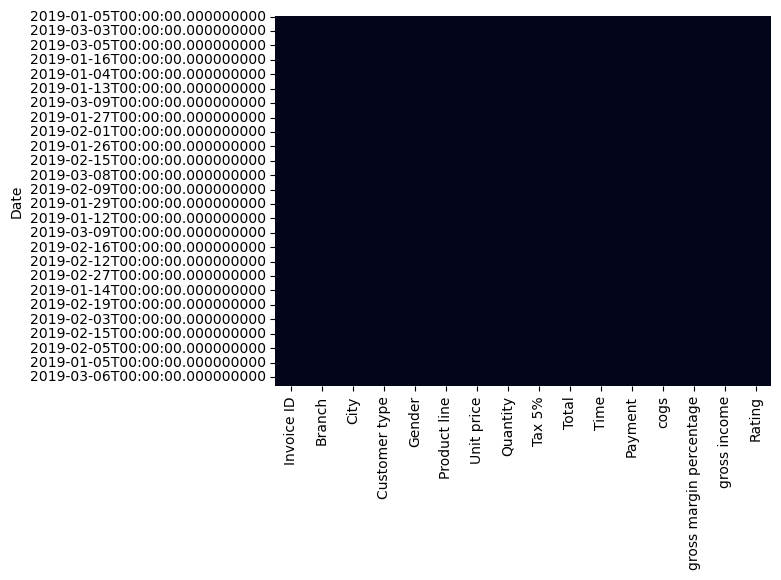

In [44]:
sns.heatmap(df.isnull(), cbar=False);

#### A Glimpse at the YData Profiling package

`ydata-profiling` is a leading package for data profiling, that automates and standardizes the generation of detailed reports, complete with statistics and visualizations. The significance of the package lies in how it streamlines the process of understanding and preparing data for analysis in a single line of code!

This will take a few seconds. The only caveat is that if you use this package on a large dataset, it may not be feasible. However, if you have a small or reasonably sized dataset and sufficient computing power, definitely use this package because it organizes your EDA so succinctly and is truly delightful. Before moving on to the next section, take some time to explore the generated report to understand the benefits of this package and what other information you can extract from the data.

In [45]:
dataset = pd.read_csv('data/supermarket_sales.csv')
prof = ProfileReport(dataset, title='Profiling Report')
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Task 5: Correlation Analysis

When you need to determine the **correlation** between any two columns, you can use the following NumPy function:

In [46]:
np.corrcoef(df['gross income'], df['Rating'])    # correlation coef between gross income and Rating

array([[ 1.       , -0.0364417],
       [-0.0364417,  1.       ]])

With this, you can notice that these two variables, despite having a negative correlation, have a very small and insignificant **correlation coefficient**. To obtain the correlation value, you can use indexing on the array.

In [47]:
round(np.corrcoef(df['gross income'], df['Rating'])[1][0], 2)

-0.04

As it would obviously be somewhat tedious to do this for every pair of variable combinations, we can instead look at the **correlation matrix** among the non-constant numeric variables to glean some insights.



In [48]:
numeric_cols = ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross income', 'Rating']
np.round(df[numeric_cols].corr(), 2)

Unit price  Quantity  Tax 5%  Total  cogs  gross income  Rating
Unit price          1.00      0.01    0.63   0.63  0.63          0.63   -0.01
Quantity            0.01      1.00    0.70   0.70  0.70          0.70   -0.02
Tax 5%              0.63      0.70    1.00   1.00  1.00          1.00   -0.04
Total               0.63      0.70    1.00   1.00  1.00          1.00   -0.04
cogs                0.63      0.70    1.00   1.00  1.00          1.00   -0.04
gross income        0.63      0.70    1.00   1.00  1.00          1.00   -0.04
Rating             -0.01     -0.02   -0.04  -0.04 -0.04         -0.04    1.00

This can be visually seen through Seaborn.

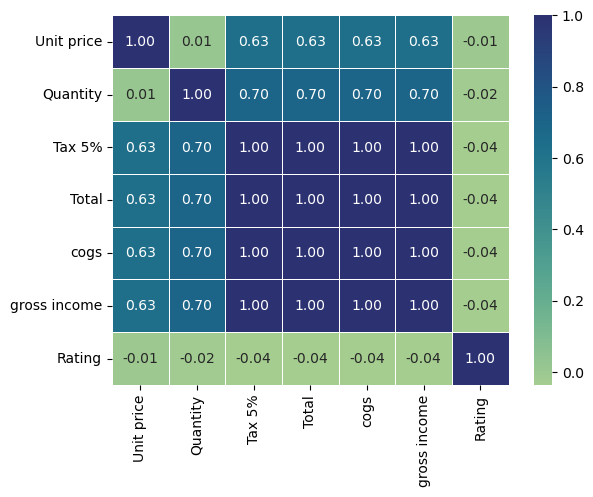

In [49]:
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt='.2f', lw='.5', cmap='crest');

It's interesting to see that User Rating has very little correlation with the rest of the variables in the dataset. No matter how much the user spends, it has no bearing on the rating of their overall experience.

### Helpful Links

1. More visualizations: https://www.data-to-viz.com/
2. Seaborn gallery: https://seaborn.pydata.org/examples/index.html
3. YData Profiling documentation: https://docs.profiling.ydata.ai/latest/

---

<!DOCTYPE html>
<html>
<head>
  <style>
    body {
      font-family: Arial, sans-serif;
      line-height: 1.6;
      background-color: #f4f4f4;
      margin: 0;
      padding: 0;
    }
    .container {
      max-width: 800px;
      margin: 20px auto;
      padding: 20px;
      background-color: #fff;
      border-radius: 5px;
      box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1);
    }
    .title {
      font-size: 1.5em;
      margin-top: 0;
      padding-bottom: 10px;
      border-bottom: 1px solid #ccc;
    }
    .notebook-info {
      margin-bottom: 20px;
    }
    .notebook-info p {
      margin-bottom: 5px;
    }
    .notebook-info strong {
      font-weight: bold;
    }
    .notebook-info em {
      font-style: italic;
    }
  </style>
</head>
<body>
  <div class="container">
    <h1 class="title">Notebook Information</h1>
    <div class="notebook-info">
      <p><strong>Notebook Title:</strong> <em>Exploratory Data Analysis with Python and Pandas</em></p>
      <p><strong>Notebook Owner:</strong> <em>Manchi Learning</em></p>
      <p><strong>Last Updated:</strong> <em>April 27, 2024</em></p>
      <p><strong>Contact:</strong> <em><a href="https://github.com/manchilearning">GitHub</a> | <a href="https://www.linkedin.com/in/gerdlp/">LinkedIn Profile</a></em></p>
      <p><strong>Description:</strong> This notebook contains the content presented in the guided project from the Coursera Project Network: <em>Exploratory Data Analysis with Python and Pandas.</em></p> 
          <p>In this project, you will learn:</p>
      <ul>
        <li>Apply practical Exploratory Data Analysis (EDA) techniques on any tabular dataset using Python packages such as Pandas and Numpy</li>
        <li>Produce data visualizations using Seaborn and Matplotlib</li>
        <li>Learn a new way to apply EDA in one line of code using the ydata_profiling package</li>
      </ul>
      <p><strong>Notes:</strong> If you follow along with this guided project using this notebook, you may find differences in the code and annotations. This is to make it easier to understand and successfully execute in recent versions of the packages. A special thanks to Bassim Eledath and the Coursera Project Network for this great learning resource. Please feel free to contact me with any comments regarding this notebook. Happy learning. </p>
    </div>
  </div>
</body>
</html>